# **Caso de estudio 2.**

El artículo titulado *"Money laundering and terrorism financing detection using neural networks and an abnormality indicator"* propone un modelo basado en aprendizaje automático para la detección de lavado de dinero (ML) y financiamiento del terrorismo (FT). El modelo mejora la comparación individual (self-comparison) al incorporar una política más completa de *Know Your Customer (KYC)*, incluyendo características no transaccionales. También mejora la comparación grupal (group-comparison) mediante el uso de un nuevo indicador de anormalidad basado en la varianza de las variables.  

Para probar el modelo, se utilizaron datos de una institución financiera en México. Se analizaron 26,751 transacciones de personas naturales y 3,527 transacciones de personas jurídicas de enero de 2020 para entrenar el modelo, y se utilizaron 1,000 y 600 transacciones, respectivamente, como datos de prueba de febrero de 2020.  

Los resultados muestran que el modelo basado en redes neuronales y el indicador de anormalidad reducen la tasa de falsos positivos en comparación con los sistemas basados en reglas, lo que permite disminuir costos y mejorar la eficiencia en la detección de transacciones sospechosas.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
# Cargar el dataset 

df = pd.read_csv("BasePFLD.csv" )
df.head()


,Unnamed: 0,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
0,0,80,100,100,100,100,100,100,70,100,...,65,65,70,80,80,90,80,100,90,100
1,1,100,100,100,100,100,100,100,70,100,...,85,85,70,80,80,90,80,100,90,100
2,2,80,100,100,100,100,100,100,70,100,...,85,65,90,80,80,90,80,100,90,100
3,3,100,100,100,100,100,100,100,70,100,...,85,85,90,80,80,90,80,100,90,100
4,4,80,100,100,100,100,100,100,70,100,...,65,85,70,80,80,90,80,100,90,100


## 1. Limpieza de datos


In [5]:
# Eliminar la columna "Unnamed: 0" 

if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace = True)


In [6]:
df.head()

,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,SubproductR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
0,80,100,100,100,100,100,100,70,100,75,...,65,65,70,80,80,90,80,100,90,100
1,100,100,100,100,100,100,100,70,100,75,...,85,85,70,80,80,90,80,100,90,100
2,80,100,100,100,100,100,100,70,100,100,...,85,65,90,80,80,90,80,100,90,100
3,100,100,100,100,100,100,100,70,100,100,...,85,85,90,80,80,90,80,100,90,100
4,80,100,100,100,100,100,100,70,100,100,...,65,85,70,80,80,90,80,100,90,100


In [7]:
df.describe()

,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,SubproductR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
count,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,...,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.00000
mean,41.052671,26.034541,49.032373,45.291017,37.006093,40.374565,35.451385,32.980823,36.973384,25.032522,...,31.307054,32.908489,38.357071,34.813091,32.319539,42.114313,33.957983,48.999290,40.361482,23.09409
std,24.879190,34.439026,21.743067,37.198085,19.840078,26.139415,40.532864,29.167841,20.172087,23.917359,...,21.955157,19.743098,21.141705,24.551769,23.244392,22.613382,22.994944,36.584002,36.703844,31.73406
min,20.000000,10.000000,33.000000,20.000000,25.000000,20.000000,10.000000,10.000000,25.000000,5.000000,...,5.000000,5.000000,10.000000,5.000000,5.000000,20.000000,10.000000,15.000000,5.000000,10.00000
25%,20.000000,10.000000,33.000000,20.000000,25.000000,20.000000,10.000000,10.000000,25.000000,5.000000,...,5.000000,25.000000,30.000000,20.000000,5.000000,20.000000,10.000000,15.000000,5.000000,10.00000
50%,40.000000,10.000000,33.000000,20.000000,25.000000,20.000000,10.000000,10.000000,25.000000,10.000000,...,25.000000,45.000000,50.000000,40.000000,20.000000,30.000000,20.000000,15.000000,5.000000,10.00000
75%,60.000000,10.000000,66.000000,100.000000,50.000000,60.000000,100.000000,70.000000,50.000000,50.000000,...,45.000000,45.000000,50.000000,60.000000,60.000000,70.000000,60.000000,85.000000,75.000000,10.00000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,70.000000,100.000000,100.000000,...,85.000000,85.000000,90.000000,80.000000,80.000000,90.000000,80.000000,100.000000,90.000000,100.00000


In [8]:
# Verificar valores nulos

print("Valores nulos en el dataset:\n \n", df.isnull().sum())


Valores nulos en el dataset:
 
 SegmentR         0
PEPR             0
AgeR             0
TimeRelationR    0
IncomeSourceR    0
ActivityR        0
NationalityR     0
CommonAddR       0
ProductTR        0
SubproductR      0
OperationTR      0
MonetaryInstR    0
DivisaR          0
ChannelR         0
OperabilitySR    0
OGoverR          0
SARR             0
VMR              0
VOR              0
SumSeR           0
SumReR           0
RSR              0
AAR              0
SendingNumR      0
ReceivingNumR    0
StateOpeR        0
StateResR        0
MunOpeR          0
MunResR          0
CountryR         0
dtype: int64


## 2. Detección de transacciones atípicas


In [10]:
# Calcular Z-score

z_scores = np.abs((df - df.mean()) / df.std())


In [11]:
# Definir umbral para valores atípicos

threshold = 3


In [12]:
# Identificar transacciones atípicas

outliers = (z_scores > threshold).sum(axis = 1) > 0


In [13]:
# Crear un DataFrame con las transacciones atípicas

df_outliers = df[outliers]
df_outliers.head()

,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,SubproductR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
0,80,100,100,100,100,100,100,70,100,75,...,65,65,70,80,80,90,80,100,90,100
1,100,100,100,100,100,100,100,70,100,75,...,85,85,70,80,80,90,80,100,90,100
2,80,100,100,100,100,100,100,70,100,100,...,85,65,90,80,80,90,80,100,90,100
3,100,100,100,100,100,100,100,70,100,100,...,85,85,90,80,80,90,80,100,90,100
4,80,100,100,100,100,100,100,70,100,100,...,65,85,70,80,80,90,80,100,90,100


In [14]:
df_outliers.shape

(2159, 30)

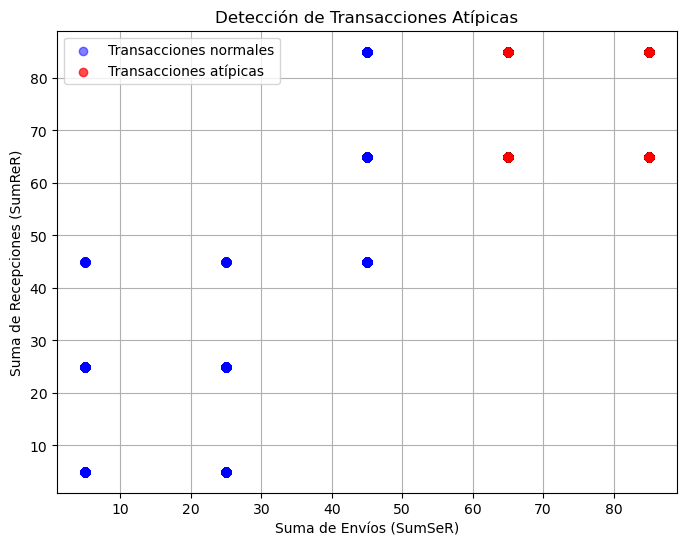

In [15]:
# Gráfico de dispersión de transacciones atípicas en dos variables clave

plt.figure(figsize = (8, 6))
plt.scatter(df["SumSeR"], df["SumReR"], alpha = 0.5, label = "Transacciones normales", color = "blue")
plt.scatter(df_outliers["SumSeR"], df_outliers["SumReR"], alpha = 0.7, label = "Transacciones atípicas", color = "red")
plt.xlabel("Suma de Envíos (SumSeR)")
plt.ylabel("Suma de Recepciones (SumReR)")
plt.title("Detección de Transacciones Atípicas")
plt.legend()
plt.grid(True)
plt.show()


## 3. Análisis de Componentes Principales (PCA)


In [17]:
# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [18]:
# Aplicar PCA con todos los componentes para calcular la varianza explicada

pca = PCA()
principal_components = pca.fit_transform(df_scaled)


In [19]:
# Calcular la varianza explicada acumulada

explained_variance = np.cumsum(pca.explained_variance_ratio_)


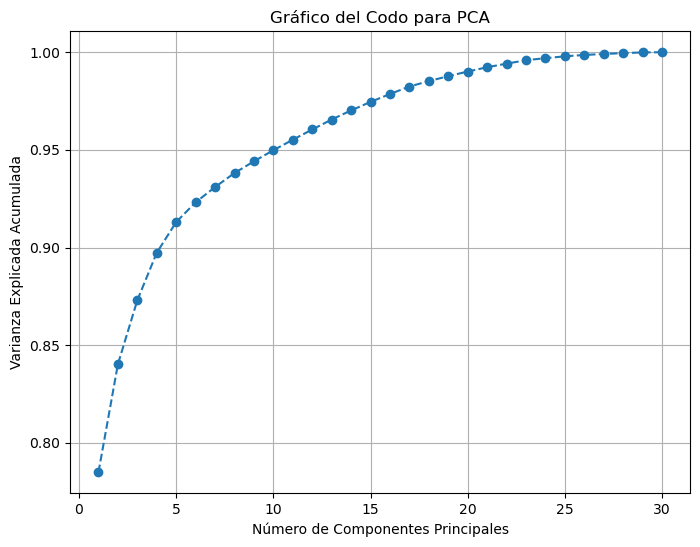

In [20]:
# Gráfico del codo (Elbow Method)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Gráfico del Codo para PCA")
plt.grid(True)
plt.show()


## 4. K-Means

Se hacen 3 clústeres para identificar las transaciones de la siguiente forma:
- Rojo (Alto Riesgo): Transacciones grandes y frecuentes.
- Naranja (Medio Riesgo): Transacciones moderadas.
- Verde (Bajo Riesgo): Transacciones pequeñas y poco frecuentes.


Para lo anterior tomemos en cuenta que:
- Si un cluster tiene altos montos de transacción y operaciones frecuentes, probablemente es Alto Riesgo.
- Si tiene montos medios y operaciones regulares, es Riesgo Medio.
- Si tiene bajos montos y poca actividad, es Bajo Riesgo.

In [23]:
# Aplicar K-Means para encontrar grupos en el espacio PCA

kmeans = KMeans(n_clusters = 3, random_state = 42)  
labels = kmeans.fit_predict(principal_components)


In [24]:
# Agregar etiquetas de cluster al dataframe original

df["Cluster"] = labels


In [25]:
# Obtener los centroides y analizar los grupos

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = df.columns[:-1])
centroids["Cluster"] = range(3)


In [26]:
# Variables clave para evaluar riesgo

key_vars = ["SumSeR", "SumReR", "SendingNumR", "ReceivingNumR", "PEPR", "ActivityR", "NationalityR"]


In [27]:
# Calcular valores promedio por cluster

cluster_summary = df.groupby("Cluster")[key_vars].mean()
cluster_summary["Num_Transacciones"] = df["Cluster"].value_counts()


In [28]:
# Ordenar clusters por monto de transacción y frecuencia de operaciones

cluster_summary = cluster_summary.sort_values(by=["SumSeR", "SumReR", "SendingNumR", "ReceivingNumR"], ascending = False)

cluster_summary


,SumSeR,SumReR,SendingNumR,ReceivingNumR,PEPR,ActivityR,NationalityR,Num_Transacciones
Cluster,,,,,,,,
2,74.601329,74.825581,80.000000,69.368771,100.000000,99.352159,100.000000,2408
0,42.721750,44.773188,50.516403,50.121507,31.488457,55.840421,56.995747,9876
1,15.020046,14.870740,16.571853,14.000138,10.000000,20.000000,10.000000,14467


El **riesgo** a cada clúster se definió considerando lo siguiente:

1. **Cluster 2 (Alto Riesgo):**
   - Suma de Envíos (SumSeR) y Recepciones (SumReR): Valores significativamente más altos.
   - Número de Envíos y Recepciones: Frecuencias elevadas.
   - PEPR y NationalityR: Altos valores, lo que puede indicar características de clientes políticamente expuestos o de nacionalidades con mayores riesgos según las tipologías.

Conclusión: Este cluster agrupa transacciones y clientes con características que podrían representar un mayor riesgo.


2. **Cluster 0 (Riesgo Medio):**
   - SumSeR y SumReR: Valores moderados.
   - Frecuencia de Envíos y Recepciones: Actividad considerable pero menor que el cluster de alto riesgo.
   - PEPR: Indicador bajo en comparación con el cluster 2, pero más alto que el cluster 1.

Conclusión: Este grupo muestra transacciones de riesgo moderado, que podrían necesitar un monitoreo ocasional.


3. **Cluster 1 (Bajo Riesgo):**
   - SumSeR y SumReR: Valores bajos, lo que indica montos menores en las transacciones.
   - Número de Envíos y Recepciones: Frecuencia significativamente menor.
   - PEPR y NationalityR: Muy bajos, indicando clientes con bajo perfil de riesgo.

Conclusión: Este cluster representa transacciones y clientes con menor probabilidad de involucrar actividades sospechosas.



Propuesta de Clasificación Final:
- Cluster 2 → Alto Riesgo
- Cluster 0 → Riesgo Medio
- Cluster 1 → Bajo Riesgo

In [31]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
sil_score = silhouette_score(principal_components, labels)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.5713883138453141


**Silhouette Score** 
- Mide qué tan bien están separados los clusters y qué tan compactos están los puntos dentro de cada cluster.
- Valores cercanos a 1 indican clusters bien definidos, mientras que valores cercanos a 0 sugieren solapamiento entre clusters.


In [33]:
# Asignar etiquetas de riesgo (Alto, Medio, Bajo)

risk_levels = {0: "Medio", 1: "Bajo", 2: "Alto"} 
cluster_summary["Nivel de Riesgo"] = cluster_summary.index.map(risk_levels)


In [34]:
cluster_summary

,SumSeR,SumReR,SendingNumR,ReceivingNumR,PEPR,ActivityR,NationalityR,Num_Transacciones,Nivel de Riesgo
Cluster,,,,,,,,,
2,74.601329,74.825581,80.000000,69.368771,100.000000,99.352159,100.000000,2408,Alto
0,42.721750,44.773188,50.516403,50.121507,31.488457,55.840421,56.995747,9876,Medio
1,15.020046,14.870740,16.571853,14.000138,10.000000,20.000000,10.000000,14467,Bajo


## 5. Graficar los datos en las componentes principales seleccionadas

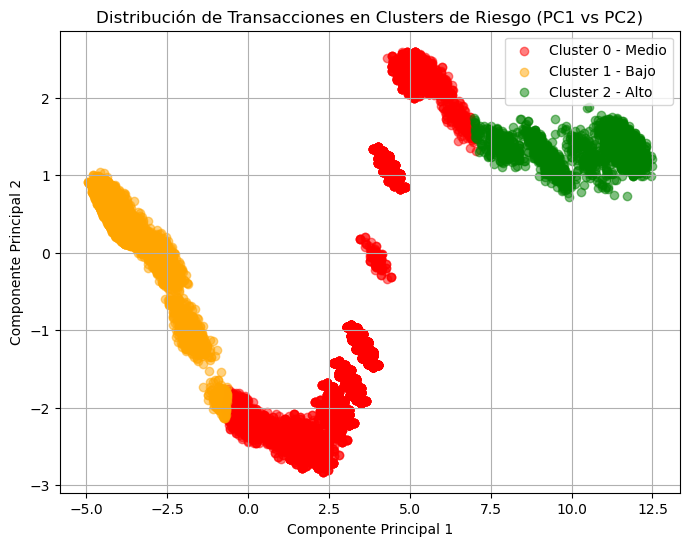

In [36]:
# Graficar PC1 vs PC2

colors = {0: "red", 1: "orange", 2: "green"}

plt.figure(figsize=(8, 6))
for cluster, color in colors.items():
    subset = df[df["Cluster"] == cluster]
    plt.scatter(principal_components[df["Cluster"] == cluster, 0], 
                principal_components[df["Cluster"] == cluster, 1], 
                c=color, label=f"Cluster {cluster} - {risk_levels[cluster]}", alpha = 0.5)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Distribución de Transacciones en Clusters de Riesgo (PC1 vs PC2)")
plt.legend()
plt.grid(True)
plt.show()


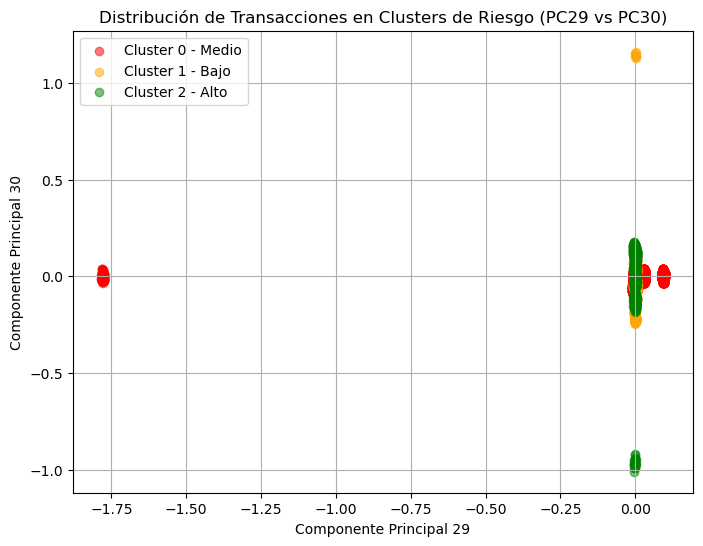

In [37]:
# Graficar PC29 vs PC30

colors = {0: "red", 1: "orange", 2: "green"}

plt.figure(figsize = (8, 6))
for cluster, color in colors.items():
    subset = df[df["Cluster"] == cluster]
    plt.scatter(principal_components[df["Cluster"] == cluster, 28], 
                principal_components[df["Cluster"] == cluster, 29], 
                c=color, label=f"Cluster {cluster} - {risk_levels[cluster]}", alpha = 0.5)

plt.xlabel("Componente Principal 29")
plt.ylabel("Componente Principal 30")
plt.title("Distribución de Transacciones en Clusters de Riesgo (PC29 vs PC30)")
plt.legend()
plt.grid(True)
plt.show()


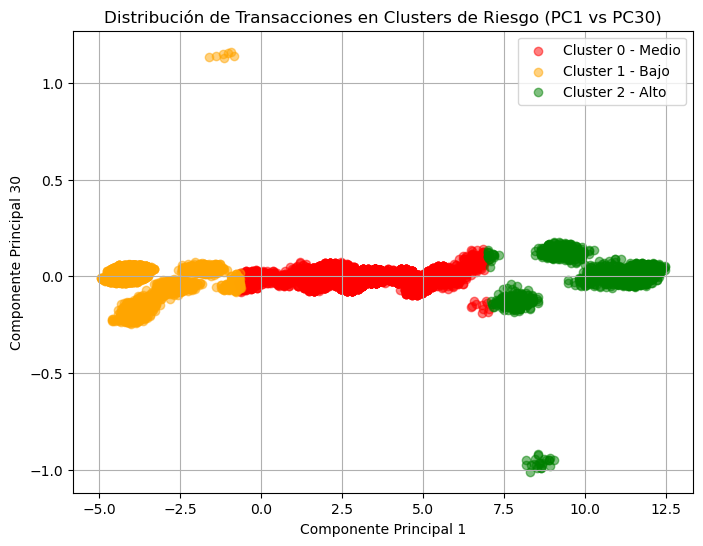

In [38]:
# Graficar PC1 vs PC30

colors = {0: "red", 1: "orange", 2: "green"}

plt.figure(figsize = (8, 6))
for cluster, color in colors.items():
    subset = df[df["Cluster"] == cluster]
    plt.scatter(principal_components[df["Cluster"] == cluster, 0], 
                principal_components[df["Cluster"] == cluster, 29], 
                c=color, label=f"Cluster {cluster} - {risk_levels[cluster]}", alpha = 0.5)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 30")
plt.title("Distribución de Transacciones en Clusters de Riesgo (PC1 vs PC30)")
plt.legend()
plt.grid(True)
plt.show()



## Guardar la información.

In [91]:
# Crear un DataFrame con todas las componentes principales y los clusters

pca_results = pd.DataFrame(principal_components, 
                           columns = [f"PC{i+1}" for i in range(principal_components.shape[1])])

pca_results["Cluster"] = labels  # Agregar la columna de clusters


In [93]:
pca_results.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Cluster
0,11.010651,1.439415,-0.561427,2.086701,0.042518,0.439449,-0.538664,-0.154986,-0.606382,0.516178,...,-0.173364,-0.299502,-0.097387,-0.133444,0.010563,-0.065184,0.103483,-0.001812,-0.032917,2
1,11.852348,1.348915,-0.559331,2.120206,0.312939,-0.030837,0.341121,-0.276914,-0.244613,-0.054673,...,-0.173733,0.151606,0.104474,0.177353,-0.025387,-0.014020,-0.113587,0.000080,0.013811,2
2,12.137616,1.388944,-0.498751,2.240881,-0.178304,0.009707,0.433203,-0.358787,0.340944,-0.371951,...,0.066567,0.084094,0.146179,0.189006,0.011072,-0.016152,-0.120980,0.001011,-0.001290,2
3,12.129393,1.325401,-1.026661,2.107552,0.759746,-0.032633,0.768403,0.006635,0.732605,-0.572972,...,0.164928,-0.131168,-0.215889,-0.278256,-0.035459,-0.015514,0.070299,0.002054,0.057023,2
4,11.385122,1.174677,-0.796234,2.502192,0.553860,0.909234,-0.217043,0.836457,0.097632,0.237320,...,0.130358,-0.150800,-0.142007,-0.232677,0.050167,-0.078562,0.084329,0.000001,-0.008373,2


In [95]:
pca_results.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Cluster
count,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,...,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,2.675100e+04,26751.000000
mean,-6.799706e-17,-2.464893e-16,-1.912417e-16,3.399853e-17,-4.674798e-17,-4.781043e-17,-3.240485e-17,6.374725e-18,-2.219201e-16,4.515430e-17,...,-2.089050e-16,4.688079e-17,8.180897e-17,2.124908e-17,6.567294e-17,-1.503705e-16,-4.887289e-17,3.424339e-17,-2.178031e-17,0.720833
std,4.852699e+00,1.287744e+00,9.921088e-01,8.539352e-01,6.869675e-01,5.506238e-01,4.836749e-01,4.644873e-01,4.238532e-01,4.128455e-01,...,2.346650e-01,2.310945e-01,1.753095e-01,1.688770e-01,1.445162e-01,1.239270e-01,1.137465e-01,1.032431e-01,5.565115e-02,0.617477
min,-4.944847e+00,-2.825236e+00,-2.564132e+00,-3.006420e+00,-2.310891e+00,-2.240089e+00,-2.682167e+00,-1.487028e+00,-1.721588e+00,-1.348271e+00,...,-8.906810e-01,-9.010460e-01,-5.693398e-01,-1.151630e+00,-8.156418e-01,-7.567452e-01,-5.532578e-01,-1.783882e+00,-1.009061e+00,0.000000
25%,-4.103359e+00,-1.163674e+00,-4.304212e-01,-3.149131e-01,-3.864431e-01,-2.594752e-01,-3.059809e-01,-2.992061e-01,-2.668137e-01,-2.737249e-01,...,-1.225018e-01,-1.354238e-01,-7.946249e-02,-3.762939e-02,-4.352283e-02,-2.182185e-02,-4.118975e-02,-1.144387e-03,-1.471921e-02,0.000000
50%,-2.633055e+00,4.585877e-01,5.719086e-02,1.240509e-01,1.138553e-03,1.204070e-02,-2.595864e-02,-1.395273e-02,2.649361e-02,7.746722e-03,...,-1.395961e-02,-2.554158e-03,-6.409687e-03,2.804422e-03,-3.921695e-03,-1.701887e-03,1.467337e-03,1.568454e-04,3.703536e-03,1.000000
75%,3.480951e+00,7.021827e-01,3.655117e-01,3.229525e-01,4.156602e-01,2.860290e-01,2.957934e-01,2.890069e-01,2.863257e-01,2.617891e-01,...,9.589581e-02,1.352244e-01,6.737883e-02,5.055562e-02,3.691644e-02,1.904825e-02,4.244455e-02,1.758268e-03,2.676142e-02,1.000000
max,1.247305e+01,2.593201e+00,2.174950e+00,2.773051e+00,2.426027e+00,1.840226e+00,1.474949e+00,2.373079e+00,1.860537e+00,1.447391e+00,...,1.219304e+00,1.339387e+00,1.088744e+00,9.354437e-01,9.926366e-01,1.643218e+00,1.038940e+00,9.868184e-02,1.159928e+00,2.000000


In [97]:
# Verificar el rango de los valores en las primeras y últimas componentes

print("Rango de valores en PC1:", pca_results["PC1"].min(), "-", pca_results["PC1"].max())
print("Rango de valores en PC2:", pca_results["PC2"].min(), "-", pca_results["PC2"].max())


Rango de valores en PC1: -4.944846541672372 - 12.473054506005814
Rango de valores en PC2: -2.8252357199446396 - 2.593200900638588


In [113]:
# Guardar todas las componentes principales en un archivo CSV

pca_results.to_csv("PCA_All_Clusters.csv", index = False, sep = "|", float_format = "%.6f")
print("Archivo exportado: PCA_All_Clusters.csv")


Archivo exportado: PCA_All_Clusters.csv


In [111]:
# Exportar con coma como separador decimal

pca_results.to_csv("PCA_All_Clusters_Comma.csv", index = False, sep = "|", decimal = ",", float_format = "%.6f")
print("Archivo exportado: PCA_All_Clusters_Comma.csv")


Archivo exportado: PCA_All_Clusters_Comma.csv


In [102]:
## Archivo con Datos Originales y Clústeres

# Agregar la columna "Cluster" al DataFrame original
df_with_clusters = df.copy()           # Crear una copia del DataFrame original
df_with_clusters["Cluster"] = labels   # Agregar la columna de clusters



In [104]:
df_with_clusters.head()

,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,SubproductR,...,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR,Cluster
0,80,100,100,100,100,100,100,70,100,75,...,65,70,80,80,90,80,100,90,100,2
1,100,100,100,100,100,100,100,70,100,75,...,85,70,80,80,90,80,100,90,100,2
2,80,100,100,100,100,100,100,70,100,100,...,65,90,80,80,90,80,100,90,100,2
3,100,100,100,100,100,100,100,70,100,100,...,85,90,80,80,90,80,100,90,100,2
4,80,100,100,100,100,100,100,70,100,100,...,85,70,80,80,90,80,100,90,100,2


In [106]:
# Guardar los datos originales con el cluster en un archivo CSV

df_with_clusters.to_csv("Original_Data_With_Clusters.csv", index = False)
print("Archivo exportado: Original_Data_With_Clusters.csv")


Archivo exportado: Original_Data_With_Clusters.csv
